## Hyperparameter Tuning
- Hyperparameter tuning is an essential part of controlling the behavior of a machine learning model.
- If we don’t correctly tune our hyperparameters, our estimated model parameters produce suboptimal results, as they don’t minimize the loss function.
- This means our model makes more errors. In practice, key indicators like the accuracy or the confusion matrix will be worse.


#### If we are performing sklearn iris flower dataset, we may not know which algorithm to choose perfect for the task. Let's say even if we choose Support vector machine, we may not know what kind of parameters we should choose, the process of choosing optimal parameter is called hypertuning.

## What are hyperparameters?
### In machine learning, we need to differentiate between parameters and hyperparameters. 

- A learning algorithm learns or estimates model parameters for the given data set, then continues updating these values as it continues to learn. After learning is complete, these parameters become part of the model. For example, each weight and bias in a neural network is a parameter.

- Hyperparameters, on the other hand, are specific to the algorithm itself, so we can’t calculate their values from the data. We use hyperparameters to calculate the model parameters. Different hyperparameter values produce different model parameter values for a given data set.

## Hyperparameter types

    Number of hidden layers: It’s a trade-off between keeping our neural network as simple as possible (fast and generalized) and classifying our input data correctly. We can start with values of four to six and check our data’s prediction accuracy when we increase or decrease this hyperparameter.

    Number of nodes/neurons per layer: More isn't always better when determining how many neurons to use per layer. Increasing neuron count can help, up to a point. But layers that are too wide may memorize the training dataset, causing the network to be less accurate on new data.

    Learning rate: Model parameters are adjusted iteratively — and the learning rate controls the size of the adjustment at each step. The lower the learning rate, the lower the changes to parameter estimates are. This means that it takes a longer time (and more data) to fit the model — but it also means that it is more likely that we actually find the minimum loss.

    Momentum: Momentum helps us avoid falling into local minima by resisting rapid changes to parameter values. It encourages parameters to keep changing in the direction they were already changing, which helps prevent zig-zagging on every iteration. Aim to start with low momentum values and adjust upward as needed.


## Methods for tuning hyperparameters

### Grid search
- Grid search is a sort of “brute force” hyperparameter tuning method. We create a grid of possible discrete hyperparameter values then fit the model with every possible combination. We record the model performance for each set then select the combination that has produced the best performance.

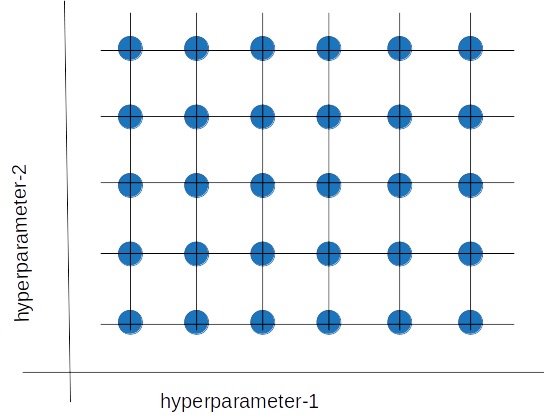

Grid search is an exhaustive algorithm that can find the best combination of hyperparameters. However, the drawback is that it’s slow. Fitting the model with every possible combination usually requires a high computation capacity and significant time, which may not be available.

### Random search
- The random search method (as its name implies) chooses values randomly rather than using a predefined set of values like the grid search method. 

- Random search tries a random combination of hyperparameters in each iteration and records the model performance. After several iterations, it returns the mix that produced the best result.

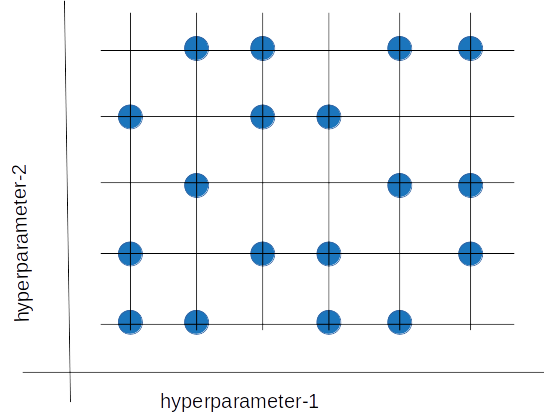

Random search is appropriate when we have several hyperparameters with relatively large search domains. We can make discrete ranges (for instance, [5-100] in steps of 5) and still get a reasonably good set of combinations.

#### Let's dive into the sklearn iris dataset problem

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

In [4]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
125,7.2,3.2,6.0,1.8,virginica
114,5.8,2.8,5.1,2.4,virginica
49,5.0,3.3,1.4,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
53,5.5,2.3,4.0,1.3,versicolor
93,5.0,2.3,3.3,1.0,versicolor
17,5.1,3.5,1.4,0.3,setosa
42,4.4,3.2,1.3,0.2,setosa
129,7.2,3.0,5.8,1.6,virginica
23,5.1,3.3,1.7,0.5,setosa


In [19]:
# spliting dataset for training and testing
x = df.drop('flower', axis=1)
y = df['flower']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=5)



In [20]:
from sklearn.svm import SVC



In [21]:
model = SVC(kernel='rbf', C=30, gamma='auto')
model.fit(x_train, y_train)


SVC(C=30, gamma='auto')

In [22]:
model.score(x_test, y_test)

0.9555555555555556

Changes on test size our score might be different.

In [23]:
# let's try using k-fold

from sklearn.model_selection import cross_val_score

In [24]:
cross_val_score(SVC(kernel='linear', C=10, gamma='auto'), iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [25]:
cross_val_score(SVC(kernel='rbf', C=10, gamma='auto'), iris.data, iris.target, cv=5)


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [26]:
cross_val_score(SVC(kernel='rbf', C=20, gamma='auto'), iris.data, iris.target, cv=5)


array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [32]:
# taking the average

import numpy as np

kernel = ['linear', 'rbf']
C = [1,10,20]
avg_score = {}


for k_val in kernel:
    for c_val in C:
        cv_score = cross_val_score(SVC(kernel=k_val, C=c_val, gamma='auto'), iris.data, iris.target, cv=5)
        avg_score[k_val+'_'+str(c_val)] = np.average(cv_score)
avg_score

{'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666,
 'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668}

#### for less parameter we can use for loop, but if we have more than 4 parameters we use grid search provided by sklearn. It perform same as for loop and good when dealing with more parameter.

In [34]:
# Lets try using grid search

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(SVC(gamma='auto'),{
    'C': [1,10,20],
    'kernel': ['linear', 'rbf']
}, cv=5, return_train_score=False)


In [35]:
clf.fit(x, y)
clf.cv_results_

{'mean_fit_time': array([0.00464935, 0.00434341, 0.00345697, 0.00405664, 0.00379124,
        0.00396299]),
 'std_fit_time': array([0.00018801, 0.00071371, 0.00015301, 0.00063878, 0.00041177,
        0.00060756]),
 'mean_score_time': array([0.00353799, 0.00303664, 0.00260139, 0.00272202, 0.0027668 ,
        0.00255575]),
 'std_score_time': array([0.00042211, 0.00046682, 0.00026358, 0.00017975, 0.00030857,
        0.00013401]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'}],


It is hard to understand this war, grid_search allow us to pirint the cv results in dataframe, let's do that

In [36]:
data = pd.DataFrame(clf.cv_results_)
data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004649,0.000188,0.003538,0.000422,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.004343,0.000714,0.003037,0.000467,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.003457,0.000153,0.002601,0.000264,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
3,0.004057,0.000639,0.002722,0.000180,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
4,0.003791,0.000412,0.002767,0.000309,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [37]:
# let's zoom in what column we need.
data[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.980000
1,1,rbf,0.980000
2,10,linear,0.973333
3,10,rbf,0.980000
4,20,linear,0.966667
5,20,rbf,0.966667


In [38]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run

In [39]:
clf.best_score_

0.9800000000000001

In [40]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

For now we have only three C i.e 1,10, 20. but what if we have range of 50 C. That's when we use RandomizedSearchCv

In [44]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(SVC(gamma='auto'),{
    'C': [1,10,20],
    'kernel': ['linear', 'rbf']
}, cv=5, return_train_score=False, n_iter=2)

In [45]:
rs.fit(x,y)
df1 = pd.DataFrame(rs.cv_results_)[['param_C', 'param_kernel', 'mean_test_score']]

In [46]:
df1.head()

,param_C,param_kernel,mean_test_score
0,20,rbf,0.966667
1,1,linear,0.980000


In [47]:
# from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [48]:
score = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x,y)
    score.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [50]:
df2 = pd.DataFrame(score, ['param_C', 'param_kernel', 'mean_test_score'])

In [51]:
df2

,model,best_score,best_params
param_C,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
param_kernel,random_forest,0.960000,{'n_estimators': 5}
mean_test_score,logistic_regression,0.966667,{'C': 5}


we can see SVM model is giving us the best_score.